In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import warnings
import seaborn as sns


In [ ]:
df = pd.read_csv('predictive_maintenance_dataset.csv')

In [ ]:
df.shape

(124494, 12)

In [ ]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [ ]:
df.duplicated

<bound method DataFrame.duplicated of              date    device  failure    metric1  metric2  metric3  metric4  \
0        1/1/2015  S1F01085        0  215630672       55        0       52   
1        1/1/2015  S1F0166B        0   61370680        0        3        0   
2        1/1/2015  S1F01E6Y        0  173295968        0        0        0   
3        1/1/2015  S1F01JE0        0   79694024        0        0        0   
4        1/1/2015  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489  11/2/2015  Z1F0MA1S        0   18310224        0        0        0   
124490  11/2/2015  Z1F0Q8RT        0  172556680       96      107        4   
124491  11/2/2015  Z1F0QK05        0   19029120     4832        0        0   
124492  11/2/2015  Z1F0QL3N        0  226953408        0        0        0   
124493  11/2/2015  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6 

In [ ]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [ ]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
total_devices = len(df.device.unique())
print('There are {} total devices'.format(total_devices))

total_failure_devices = len(df[df.failure == 1].device.unique())
print('There are {} total failure devices'.format(total_failure_devices))

There are 1169 total devices
There are 106 total failure devices


In [ ]:
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

In [ ]:
df.date = pd.to_datetime(df.date)

df['activedays']=df.date-df.date[0]

df['month']=df['date'].dt.month
df['week_day']=df.date.dt.weekday
df['week_day'].replace(0,7,inplace=True)
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7


In [ ]:
df.groupby('month').agg({'device':lambda x: x.nunique()})

,device
month,
1,1164
2,726
3,685
4,491
5,424
6,353
7,346
8,334
9,184


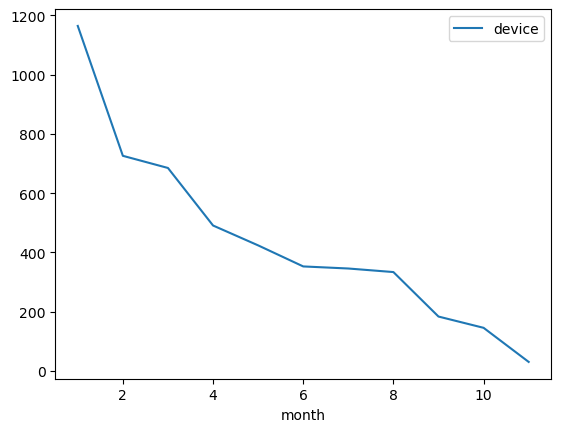

In [ ]:
df.groupby('month').agg({'device':lambda x: x.nunique()}).plot()
plt.show()

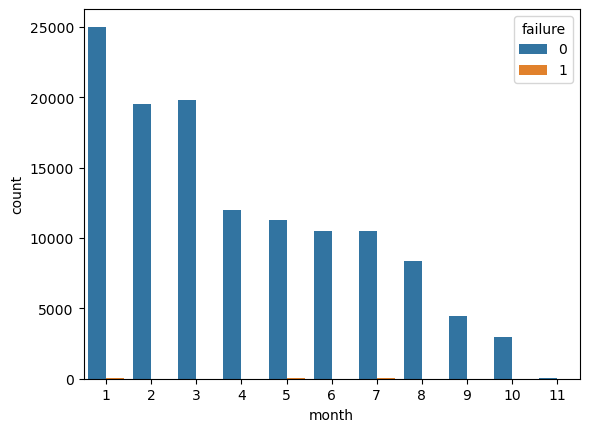

In [ ]:
ax = sns.countplot(x="month", hue="failure", data=df)
plt.show()

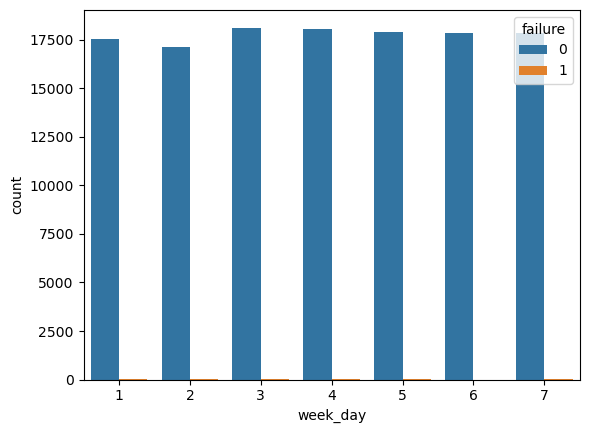

In [ ]:
ax = sns.countplot(x='week_day',hue='failure',data=df)
plt.show()

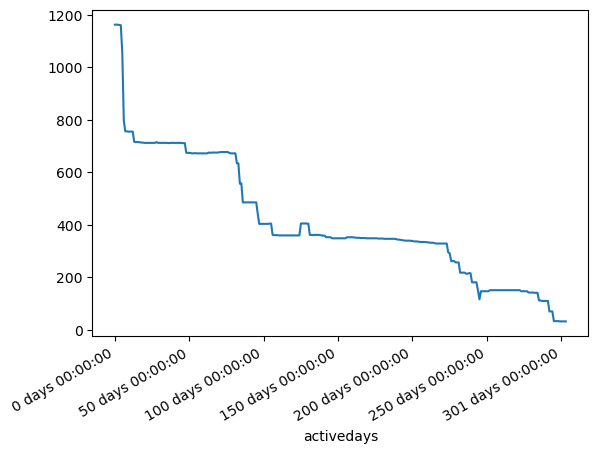

In [ ]:
df.groupby('activedays')['device'].count().plot()
plt.show()

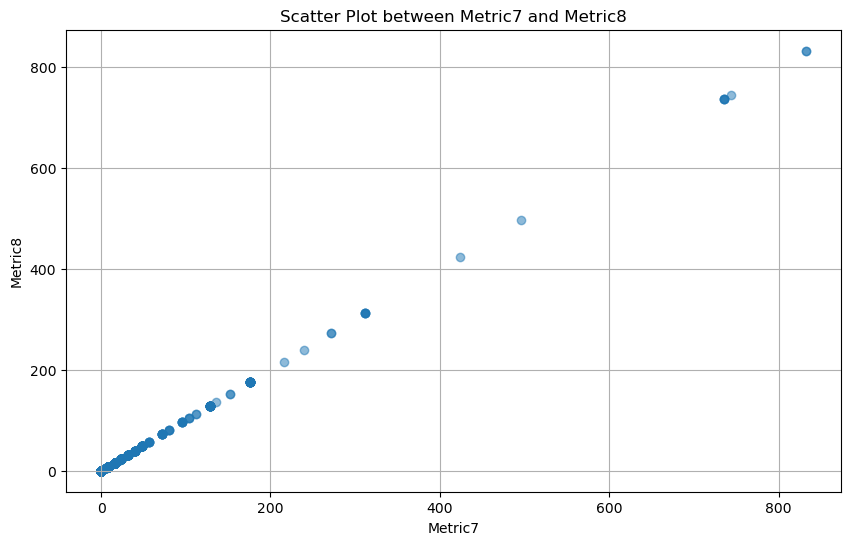

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)
plt.title('Scatter Plot between Metric7 and Metric8')
plt.xlabel('Metric7')
plt.ylabel('Metric8')
plt.grid(True)
plt.show()

In [ ]:
max(df.date), min(df.date)

(Timestamp('2015-11-02 00:00:00'), Timestamp('2015-01-01 00:00:00'))

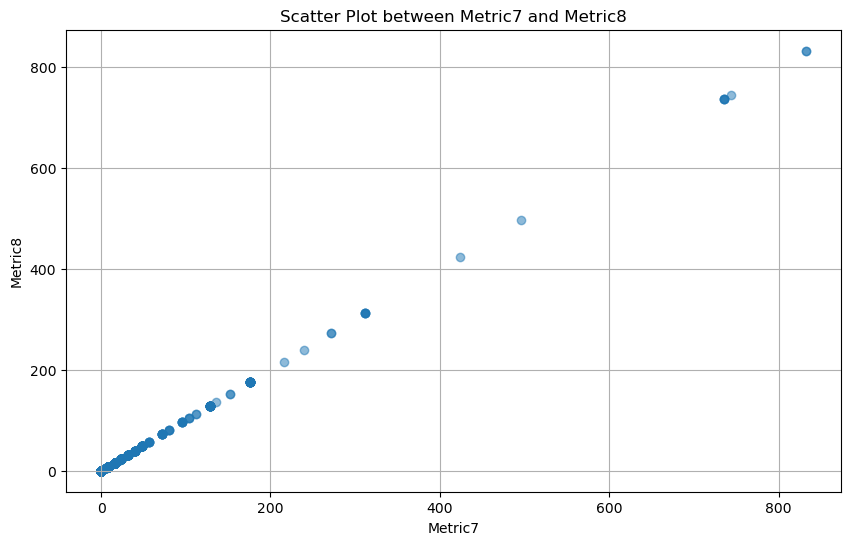

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)
plt.title('Scatter Plot between Metric7 and Metric8')
plt.xlabel('Metric7')
plt.ylabel('Metric8')
plt.grid(True)
plt.show()

Distribution for failure is 0


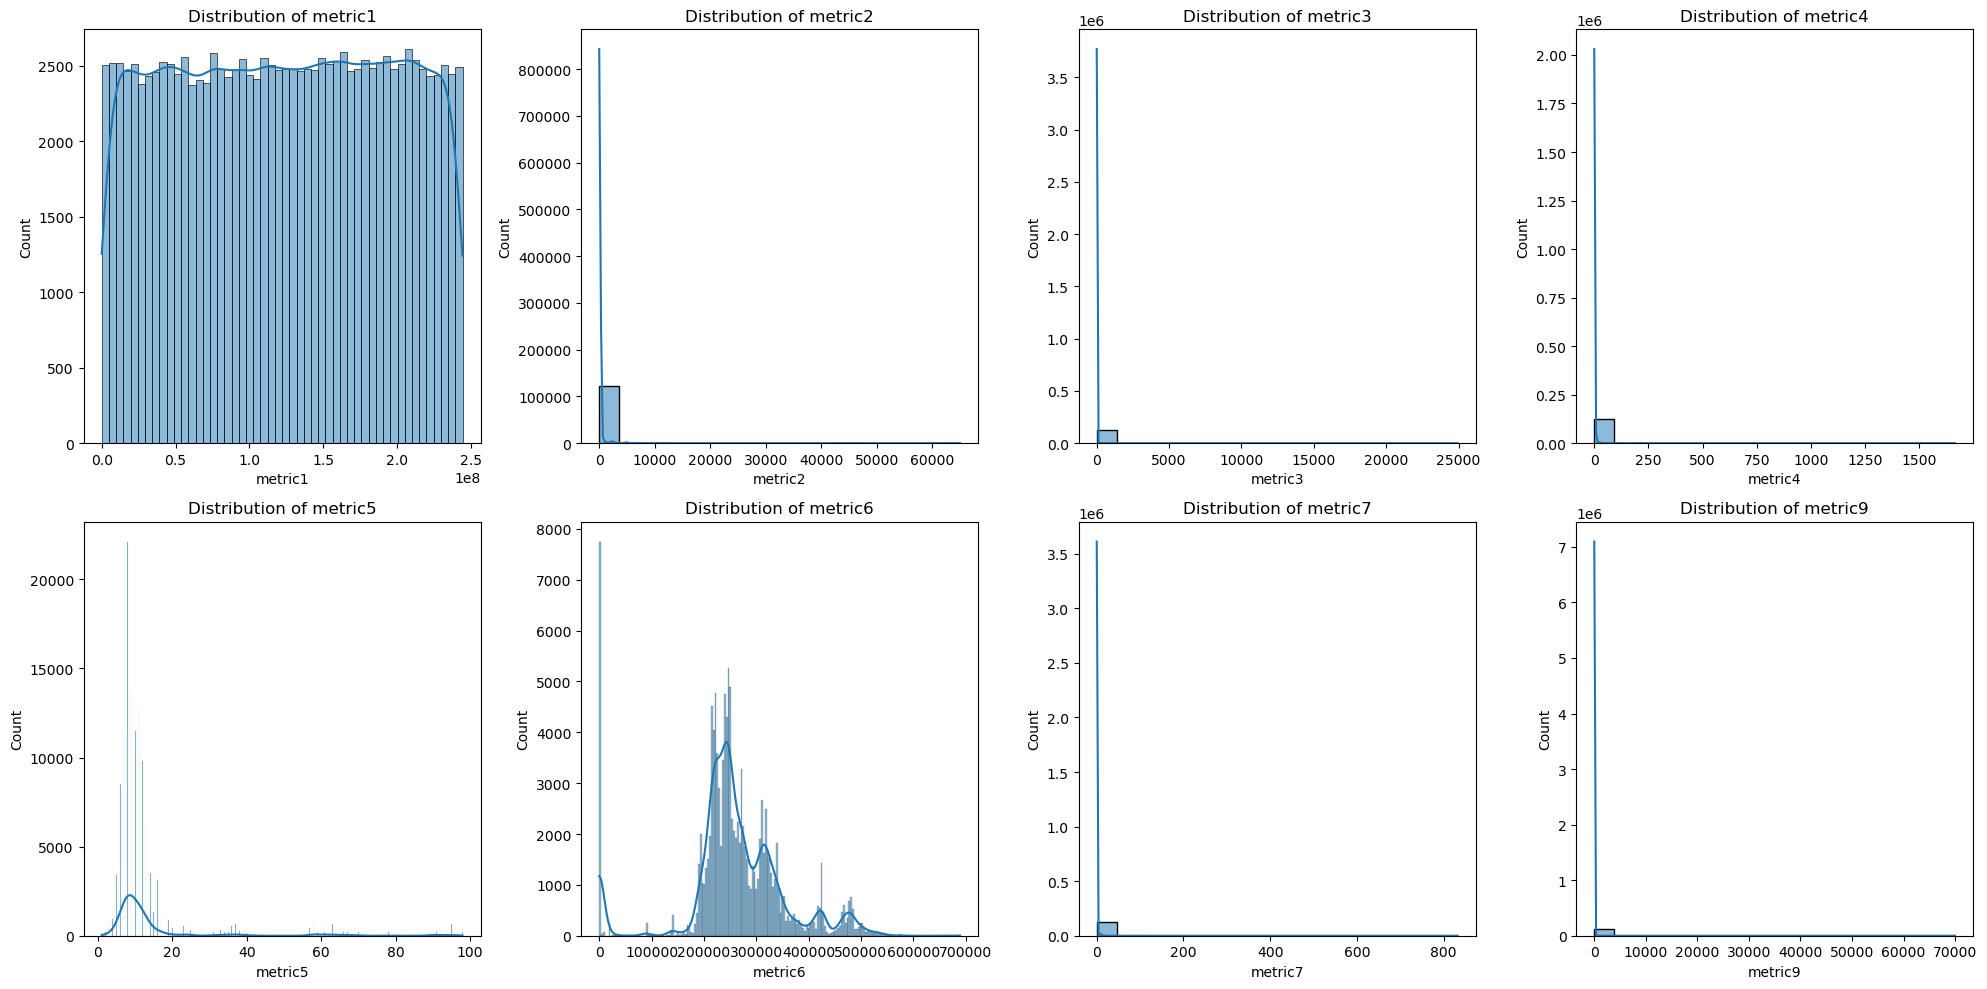

In [ ]:
plt.figure(figsize=(4*5, 2*5))
print("Distribution for failure is 0")
mask= df.failure==0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7',  'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

In [ ]:
df_date = df.groupby('device').agg({'date':max})

df_date.date.to_dict()

df_failure = df.loc[df.failure==1,['device','date']]

df_good = df.loc[df.failure==0,['device','date']]

df_date.shape,df_failure.shape

df['max_date']=df.device.map(df_date.date.to_dict())

df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3,2015-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7,2015-11-02
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7,2015-11-02
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7,2015-11-02
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7,2015-11-02


In [ ]:
dff=df[(df.failure==1)&(df.date!=df.max_date)]

dff

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
77958,2015-05-05,S1F136J0,1,131519808,0,0,25,16,343464,8,8,0,124 days,5,1,2015-05-06
79590,2015-05-09,W1F0KCP2,1,176861128,10392,0,121,6,310699,0,0,0,128 days,5,5,2015-05-11
79601,2015-05-09,W1F0M35B,1,141805096,0,0,1,7,267203,0,0,0,128 days,5,5,2015-05-11
101999,2015-07-12,S1F0GPFZ,1,236544080,0,0,0,9,264594,0,0,0,192 days,7,6,2015-07-24
104223,2015-07-18,W1F11ZG9,1,32671632,368,9,486,3,344433,0,0,1,198 days,7,5,2015-08-17


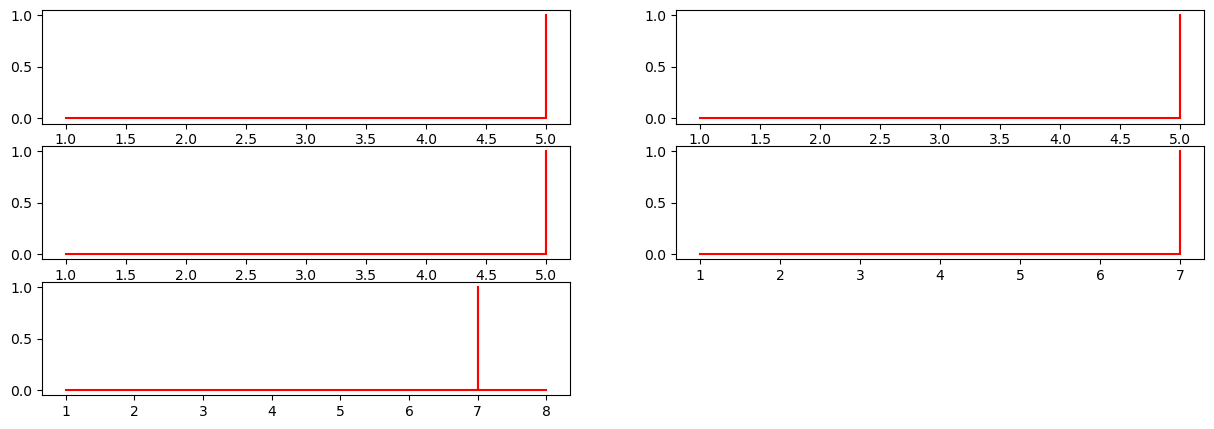

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(3, 2, 1)
plt.plot(df.loc[df['device']=='S1F136J0',['failure','month']]['month'],df.loc[df['device']=='S1F136J0',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 2)
plt.plot(df.loc[df['device']=='W1F0KCP2',['failure','month']]['month'],df.loc[df['device']=='W1F0KCP2',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 3)
plt.plot(df.loc[df['device']=='W1F0M35B',['failure','month']]['month'],df.loc[df['device']=='W1F0M35B',\
         ['failure','month']]['failure'],\
          color = 'red')
fig.add_subplot(3, 2, 4)
plt.plot(df.loc[df['device']=='S1F0GPFZ',['failure','month']]['month'],df.loc[df['device']=='S1F0GPFZ',\
         ['failure','month']]['failure'],\
         color = 'red')
fig.add_subplot(3, 2, 5)
plt.plot(df.loc[df['device']=='W1F11ZG9',['failure','month']]['month'],df.loc[df['device']=='W1F11ZG9',\
         ['failure','month']]['failure'],\
         color = 'red')

plt.show()


In [ ]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3,2015-08-24


In [ ]:
df.metric1.nunique()

123877

In [ ]:
df1 = df.groupby('device').agg({'date':max})

In [ ]:
df1.shape

(1169, 1)

In [ ]:
df1

,date
device,
S1F01085,2015-01-06
S1F013BB,2015-05-11
S1F0166B,2015-01-06
S1F01E6Y,2015-02-17
S1F01JE0,2015-01-06
...,...
Z1F1VMZB,2015-10-19
Z1F1VQFY,2015-06-30
Z1F26YZB,2015-03-25


In [ ]:
df1=df1.reset_index()

df=df.reset_index(drop=True)

df2= pd.merge(df1,df,how='left',on=['device','date'])

df2.shape

(1169, 16)

In [ ]:
df2

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Z1F1VMZB,2015-10-19,0,96949360,0,0,0,5,263507,0,0,0,291 days,10,7,2015-10-19
1165,Z1F1VQFY,2015-06-30,1,178051496,0,0,0,7,265316,0,0,0,180 days,6,1,2015-06-30
1166,Z1F26YZB,2015-03-25,0,229065488,0,1,0,1,292052,0,0,0,83 days,3,2,2015-03-25
1167,Z1F282ZV,2015-03-25,0,72717600,0,1,0,1,192919,0,0,0,83 days,3,2,2015-03-25


In [ ]:
df2['failure_before']=0

In [ ]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06,0
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11,0
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06,0
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17,0
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06,0


In [ ]:
df2.loc[df2.device == 'S1F136J0','failure_before'] = 1
df2.loc[df2.device == 'W1F0KCP2','failure_before'] = 1
df2.loc[df2.device == 'W1F0M35B','failure_before'] = 1
df2.loc[df2.device == 'S1F0GPFZ','failure_before'] = 1
df2.loc[df2.device == 'W1F11ZG9','failure_before'] = 1

In [ ]:
df2.device

0       S1F01085
1       S1F013BB
2       S1F0166B
3       S1F01E6Y
4       S1F01JE0
          ...   
1164    Z1F1VMZB
1165    Z1F1VQFY
1166    Z1F26YZB
1167    Z1F282ZV
1168    Z1F2PBHX
Name: device, Length: 1169, dtype: object

In [ ]:
Id = df2.device.values.tolist()

In [ ]:
Id1 = []
for i in Id:
    i = i[:4]
    Id1.append(i)

df2.device=Id1

df2.device.value_counts()

S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: device, dtype: int64

In [ ]:
dev=pd.crosstab(df2['device'],df2['failure'])

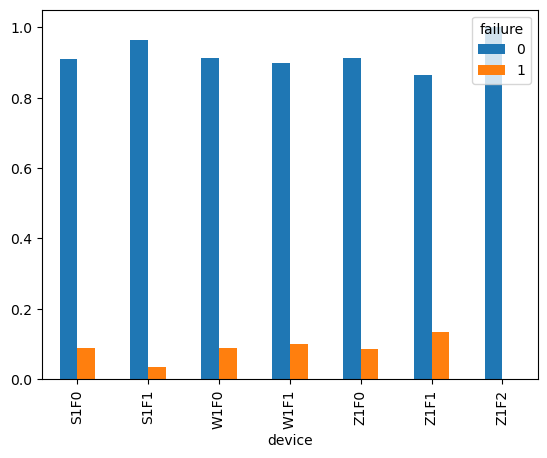

In [ ]:
dev.div(dev.sum(1).astype(float), axis=0).plot(kind="bar")
plt.show()

In [ ]:
df2

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F0,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Z1F1,2015-10-19,0,96949360,0,0,0,5,263507,0,0,0,291 days,10,7,2015-10-19,0
1165,Z1F1,2015-06-30,1,178051496,0,0,0,7,265316,0,0,0,180 days,6,1,2015-06-30,0
1166,Z1F2,2015-03-25,0,229065488,0,1,0,1,292052,0,0,0,83 days,3,2,2015-03-25,0
1167,Z1F2,2015-03-25,0,72717600,0,1,0,1,192919,0,0,0,83 days,3,2,2015-03-25,0


In [ ]:
df2.nunique()

device               7
date               104
failure              2
metric1           1168
metric2            118
metric3             44
metric4             67
metric5             58
metric6           1135
metric7             22
metric8             22
metric9             64
activedays         104
month               11
week_day             7
max_date           104
failure_before       2
dtype: int64

In [ ]:
cat_ftrs = ['metric3','metric4', 'metric5', 'metric7', 'metric9']
for col in cat_ftrs:
    df2[col]=df2[col].astype('object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   device          1169 non-null   object         
 1   date            1169 non-null   datetime64[ns] 
 2   failure         1169 non-null   int64          
 3   metric1         1169 non-null   int64          
 4   metric2         1169 non-null   int64          
 5   metric3         1169 non-null   object         
 6   metric4         1169 non-null   object         
 7   metric5         1169 non-null   object         
 8   metric6         1169 non-null   int64          
 9   metric7         1169 non-null   object         
 10  metric8         1169 non-null   int64          
 11  metric9         1169 non-null   object         
 12  activedays      1169 non-null   timedelta64[ns]
 13  month           1169 non-null   int64          
 14  week_day        1169 non-null   int64   

In [ ]:
def str_to_num(str):
    return str.split(' ')[0]

df2.activedays = df2.activedays.astype('str')

df2.activedays=df2.activedays.apply(str_to_num)
df2.activedays = df2.activedays.astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   int64         
 14  week_day        1169 non-null   int64         
 15  max_

In [ ]:
for col in ['month','week_day']:
    df2[col]=df2[col].astype('object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   int64         
 4   metric2         1169 non-null   int64         
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   int64         
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  week_day        1169 non-null   object        
 15  max_

In [ ]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F0,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5,1,1,2015-01-06,0


C:\Users\hp\AppData\Local\Temp\ipykernel_36704\3822345204.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['metric1'],ax=axarr[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_36704\3822345204.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(1+df2['metric1']),ax=axarr[1])


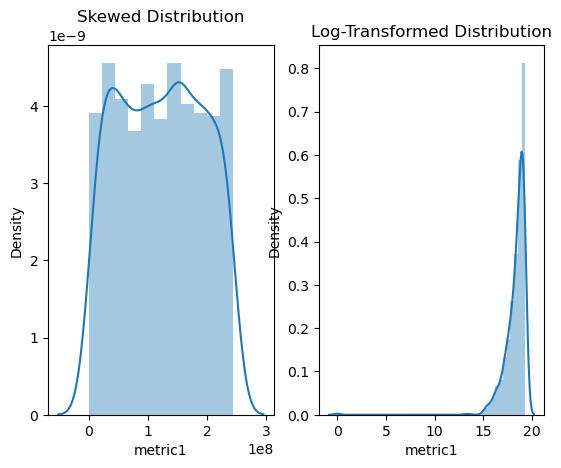

In [ ]:
f, axarr = plt.subplots(1,2)
sns.distplot(df2['metric1'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df2['metric1']),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_36704\3762687542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['metric2'],ax=axarr[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_36704\3762687542.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(1+df2['metric2']),ax=axarr[1])


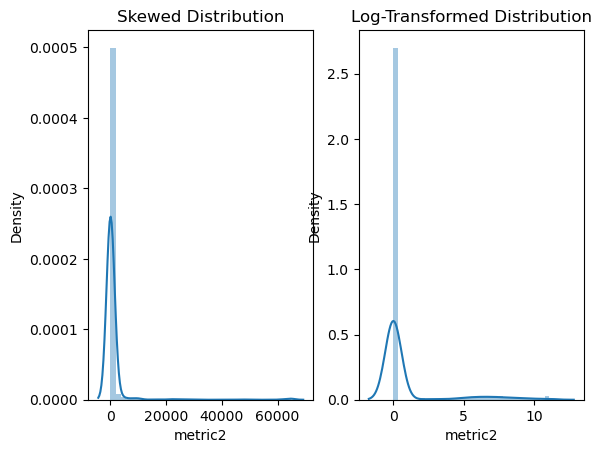

In [ ]:
f, axarr = plt.subplots(1,2)

sns.distplot(df2['metric2'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df2['metric2']),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_36704\84151971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['metric6'],ax=axarr[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_36704\84151971.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(1+df2['metric6']),ax=axarr[1])


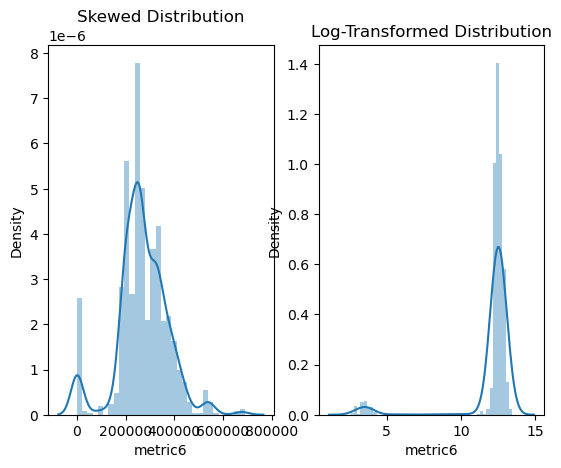

In [ ]:
f, axarr = plt.subplots(1,2)
sns.distplot(df2['metric6'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df2['metric6']),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_ftrs =['metric1','metric2','metric6']
df2[num_ftrs]=scaler.fit_transform(df2[num_ftrs])

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   metric1         1169 non-null   float64       
 4   metric2         1169 non-null   float64       
 5   metric3         1169 non-null   object        
 6   metric4         1169 non-null   object        
 7   metric5         1169 non-null   object        
 8   metric6         1169 non-null   float64       
 9   metric7         1169 non-null   object        
 10  metric8         1169 non-null   int64         
 11  metric9         1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  week_day        1169 non-null   object        
 15  max_

C:\Users\hp\AppData\Local\Temp\ipykernel_36704\3822345204.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['metric1'],ax=axarr[0])
C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\AppData\Local\Temp\ipykernel_36704\3822345204.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your

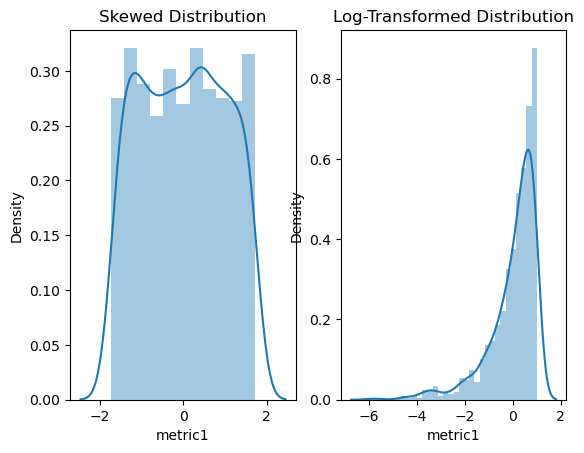

In [ ]:
f, axarr = plt.subplots(1,2)
sns.distplot(df2['metric1'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df2['metric1']),ax=axarr[1])
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

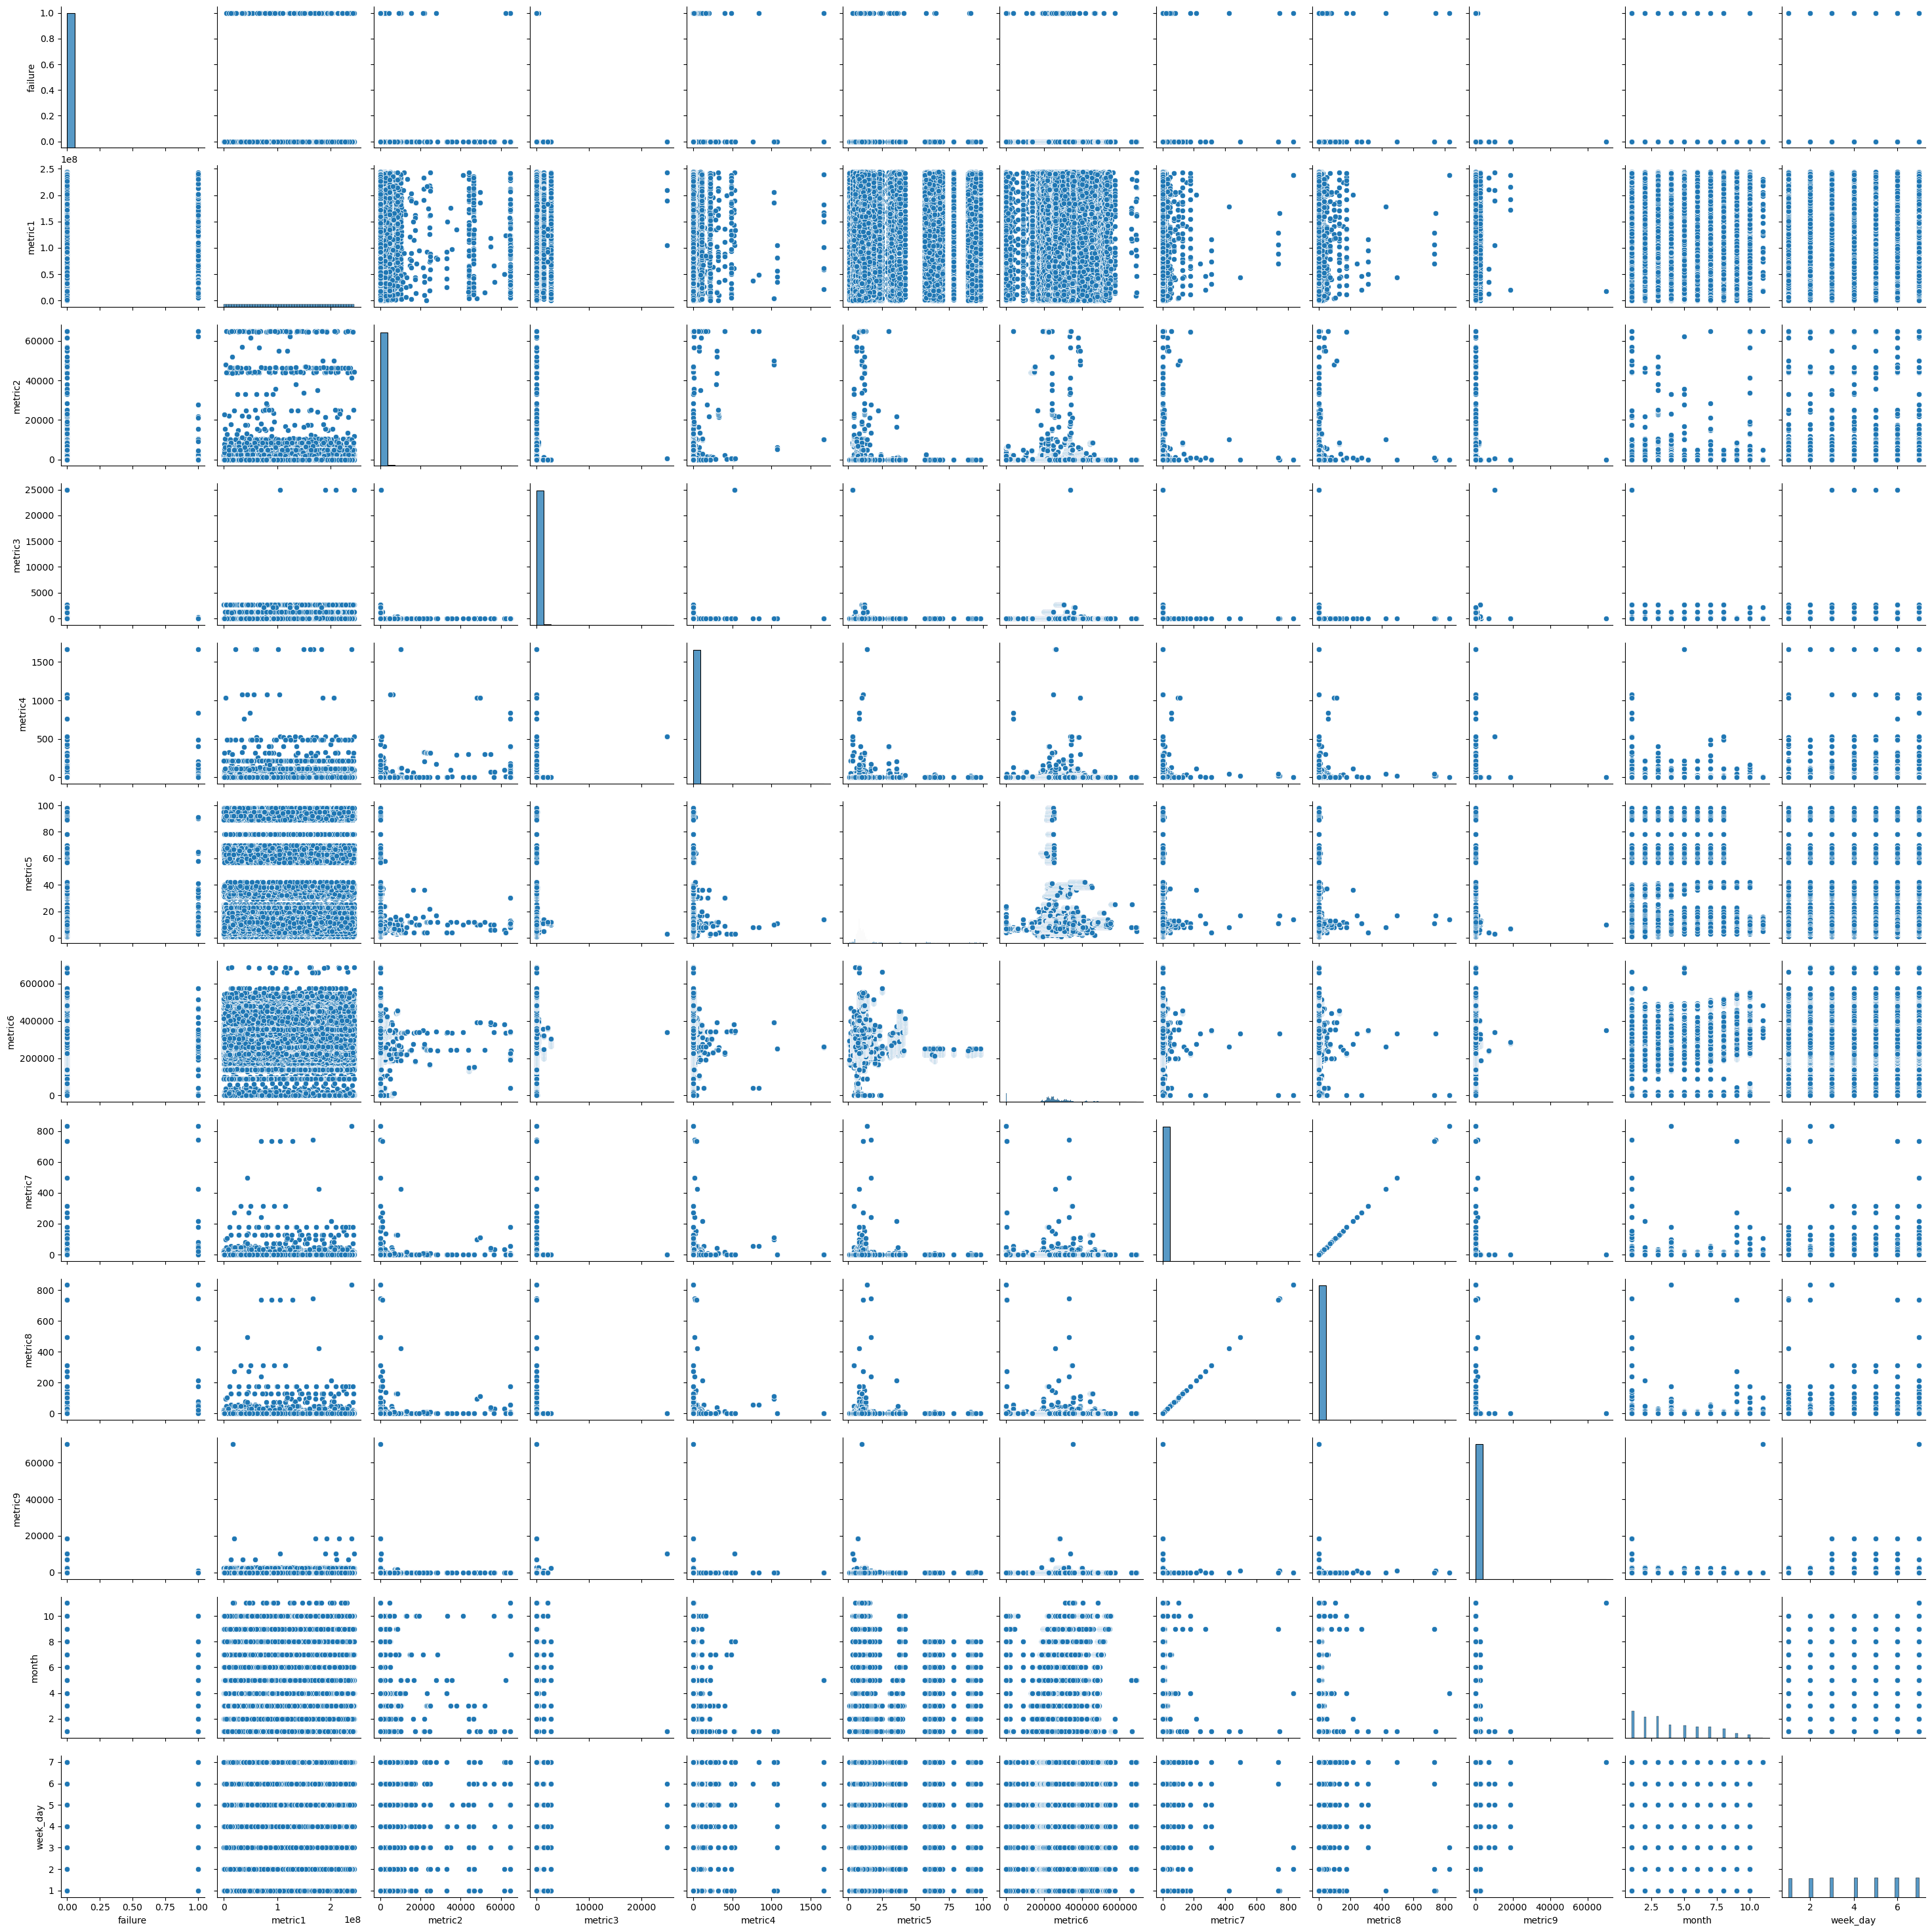

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
(df['metric7']==df['metric8']).value_counts()

True    124494
dtype: int64

In [ ]:
df.drop('metric8',axis=1,inplace=True)

In [ ]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,month,week_day,max_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0 days,1,3,2015-08-24


In [ ]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,max_date,failure_before
0,S1F0,2015-01-06,0,0.094795,-0.136309,0,52,6,1.333502,0,0,7,5,1,1,2015-01-06,0
1,S1F0,2015-05-11,0,-0.092146,-0.145660,0,0,5,4.008798,0,0,0,130,5,7,2015-05-11,0
2,S1F0,2015-01-06,0,-1.630184,-0.145660,3,0,6,1.289341,0,0,0,5,1,1,2015-01-06,0
3,S1F0,2015-02-17,0,0.357937,-0.145660,0,0,12,-0.100105,0,0,0,47,2,1,2015-02-17,0
4,S1F0,2015-01-06,0,0.898989,-0.145660,0,0,6,1.359772,0,0,0,5,1,1,2015-01-06,0


In [ ]:
df2.drop(['date','max_date'],axis=1,inplace=True)

In [ ]:
df2.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,activedays,month,week_day,failure_before
0,S1F0,0,0.094795,-0.136309,0,52,6,1.333502,0,0,7,5,1,1,0
1,S1F0,0,-0.092146,-0.145660,0,0,5,4.008798,0,0,0,130,5,7,0
2,S1F0,0,-1.630184,-0.145660,3,0,6,1.289341,0,0,0,5,1,1,0
3,S1F0,0,0.357937,-0.145660,0,0,12,-0.100105,0,0,0,47,2,1,0
4,S1F0,0,0.898989,-0.145660,0,0,6,1.359772,0,0,0,5,1,1,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   device          1169 non-null   object 
 1   failure         1169 non-null   int64  
 2   metric1         1169 non-null   float64
 3   metric2         1169 non-null   float64
 4   metric3         1169 non-null   object 
 5   metric4         1169 non-null   object 
 6   metric5         1169 non-null   object 
 7   metric6         1169 non-null   float64
 8   metric7         1169 non-null   object 
 9   metric8         1169 non-null   int64  
 10  metric9         1169 non-null   object 
 11  activedays      1169 non-null   int32  
 12  month           1169 non-null   object 
 13  week_day        1169 non-null   object 
 14  failure_before  1169 non-null   int64  
dtypes: float64(3), int32(1), int64(3), object(8)
memory usage: 141.6+ KB


In [ ]:
df2 = pd.get_dummies(df2,drop_first=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_36704\2538390326.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2 = pd.get_dummies(df2,drop_first=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_36704\2538390326.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2 = pd.get_dummies(df2,drop_first=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_36704\2538390326.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2 = pd.get_dummies(df2,drop_first=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_36704\2538390326.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2 = pd.g

In [ ]:
df2.head()

,failure,metric1,metric2,metric6,metric8,activedays,failure_before,device_S1F1,device_W1F0,device_W1F1,...,month_8,month_9,month_10,month_11,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,week_day_7
0,0,0.094795,-0.136309,1.333502,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.092146,-0.145660,4.008798,0,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,-1.630184,-0.145660,1.289341,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.357937,-0.145660,-0.100105,0,47,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.898989,-0.145660,1.359772,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.shape

(1169, 279)

In [ ]:
df2.failure.value_counts()

0    1068
1     101
Name: failure, dtype: int64

In [ ]:
X = df2.drop('failure',axis=1)
Y = df2.failure

In [ ]:
X

,metric1,metric2,metric6,metric8,activedays,failure_before,device_S1F1,device_W1F0,device_W1F1,device_Z1F0,...,month_8,month_9,month_10,month_11,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,week_day_7
0,0.094795,-0.136309,1.333502,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.092146,-0.145660,4.008798,0,130,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.630184,-0.145660,1.289341,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.357937,-0.145660,-0.100105,0,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.898989,-0.145660,1.359772,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,-0.358265,-0.145660,-0.061700,0,291,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1165,0.794211,-0.145660,-0.044401,0,180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1166,1.519129,-0.145660,0.211274,0,83,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1167,-0.702603,-0.145660,-0.736728,0,83,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1164    0
1165    1
1166    0
1167    0
1168    0
Name: failure, Length: 1169, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [ ]:
log.fit(X_train, Y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy_score(Y_test, predictions)

0.9230769230769231

In [ ]:
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       321
           1       0.67      0.20      0.31        30

    accuracy                           0.92       351
   macro avg       0.80      0.60      0.63       351
weighted avg       0.91      0.92      0.90       351

[[318   3]
 [ 24   6]]


In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='newton-cg')
log.fit(X_train, Y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
predictions = log.predict(X_test)

In [ ]:
accuracy_score(Y_test, predictions)

0.9316239316239316

In [ ]:
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       321
           1       0.88      0.23      0.37        30

    accuracy                           0.93       351
   macro avg       0.90      0.62      0.67       351
weighted avg       0.93      0.93      0.91       351

[[320   1]
 [ 23   7]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(Y_test, y_pred))

0.9487179487179487


In [ ]:
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       321
           1       0.80      0.53      0.64        30

    accuracy                           0.95       351
   macro avg       0.88      0.76      0.81       351
weighted avg       0.94      0.95      0.94       351

[[317   4]
 [ 14  16]]
